In [13]:
#################################################
### Auther: Asiri Amal              #############
### Title: Comic Bubble Extractor   #############
### Date : 08/02/2020               #############
#################################################

## Description:
* This version uses image segmentation 
* We are using model '0207_e500_std_model_4.h5' Cited by: https://github.com/DRDRD18/balloons


## Install

###  Execute below code by using command/conda promt in the location
pip3 install -r requirements.txt

In [24]:
# imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage.io import imread, imsave
from skimage.transform import resize
from tensorflow.python.keras import models

## Please Set Below values if you want to change

In [15]:
### Set path values
# Initial path values are in the folder structure
# Input Images -> './sample'

input_path = "./sample/"

output_path = "OCR_SPACE_Segmentation/"

segmented_path = "segmented_images/"

try:
    os.mkdir(output_path)
    print("Output File: {:s} has been created".format(output_path))
except FileExistsError:
    print("Output File Already Exists...!")
    
try:
    os.mkdir(segmented_path)
    print("Segmented File: {:s} has been created".format(segmented_path))
except FileExistsError:
    print("Segmented Image File Already Exists...!")

Output File Already Exists...!
Segmented Image File Already Exists...!


In [16]:
imglist = os.listdir(input_path)
imageList = [(lambda x: input_path +x)(x) for x in imglist]

## Load Model

In [17]:
model_path = '0207_e500_std_model_4.h5'

model = models.load_model(model_path)

In [18]:
##################################################################################################

In [19]:
def plot(img):
    plt.figure(figsize = (15,20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Save Segmented Images

In [20]:
for i in range(len(imageList)):
    img = cv2.imread(imageList[i])
    img = resize(img, (768,512), anti_aliasing=True, preserve_range=True)
    img = np.expand_dims(img, axis=0)
    img = img/255
    p = model.predict(img)
    p = p.reshape(768, 512)
    
    segmented_image = segmented_path+imglist[i]+".jpg"
    cv2.imwrite(segmented_image, p *255)
    print("Segemented image \"{:s}\" Has been saved...! Number of images Saved: {:d}".format(segmented_image, i+1))

Segemented image "segmented_images/sample-0.png.jpg" Has been saved...! Number of images Saved: 1
Segemented image "segmented_images/sample-1.png.jpg" Has been saved...! Number of images Saved: 2
Segemented image "segmented_images/sample-10.png.jpg" Has been saved...! Number of images Saved: 3
Segemented image "segmented_images/sample-11.png.jpg" Has been saved...! Number of images Saved: 4
Segemented image "segmented_images/sample-12.jpg.jpg" Has been saved...! Number of images Saved: 5
Segemented image "segmented_images/sample-13.jpg.jpg" Has been saved...! Number of images Saved: 6
Segemented image "segmented_images/sample-14.jpg.jpg" Has been saved...! Number of images Saved: 7
Segemented image "segmented_images/sample-15.jpg.jpg" Has been saved...! Number of images Saved: 8
Segemented image "segmented_images/sample-16.jpg.jpg" Has been saved...! Number of images Saved: 9
Segemented image "segmented_images/sample-17.jpg.jpg" Has been saved...! Number of images Saved: 10
Segemented 

In [21]:
seglist = os.listdir(segmented_path)
segList = [(lambda x: segmented_path+x)(x) for x in seglist]

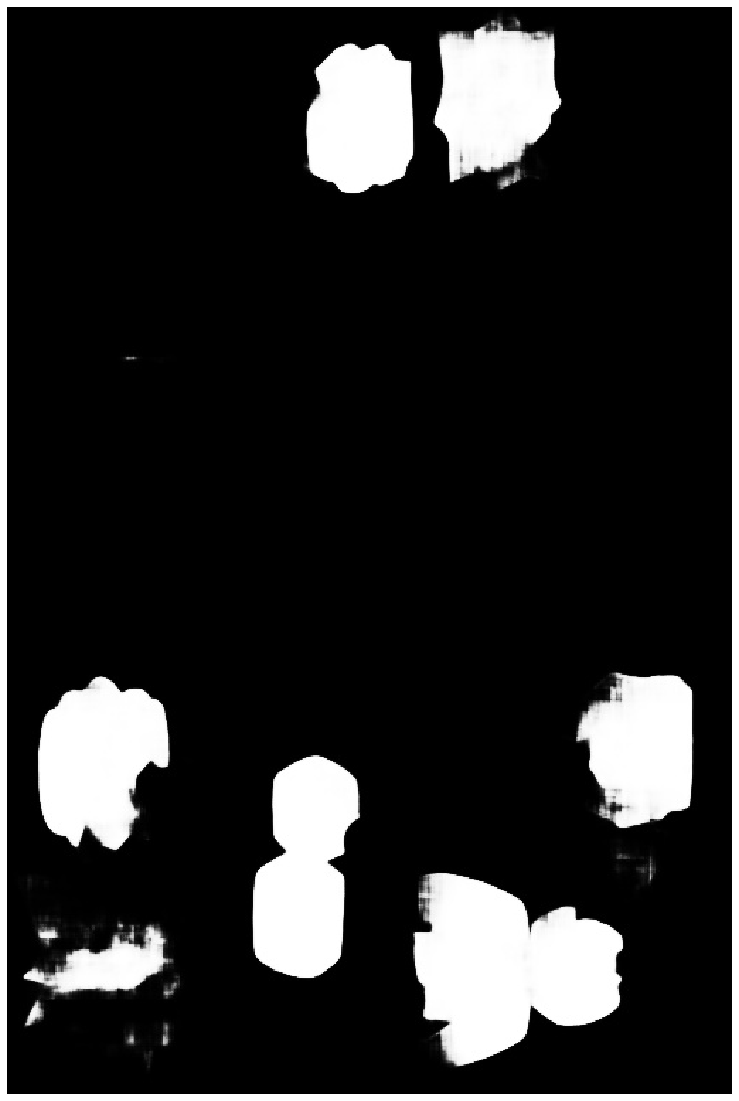

In [25]:
img = cv2.imread(segList[0])
plot(img)

## Bubble Extractions..

In [26]:
# find all speech bubbles in the given comic page and return a list of cropped speech bubbles (with possible false positives)
def findSpeechBubbles(imagePath, segPath, method = 'simple'):
    color = (255, 0, 0) 
    # read image
    image = cv2.imread(segPath)

    img = cv2.imread(imagePath)
    # gray scale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # filter noise
    imageGrayBlur = cv2.GaussianBlur(imageGray,(3,3),0)
    if method != 'simple':
        # recognizes more complex bubble shapes
        imageGrayBlurCanny = cv2.Canny(imageGrayBlur,50,500)
        binary = cv2.threshold(imageGrayBlurCanny,235,255,cv2.THRESH_BINARY)[1]
    else:
        # recognizes only rectangular bubbles
        binary = cv2.threshold(imageGrayBlur,235,255,cv2.THRESH_BINARY)[1]
    # find contours
    contours = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]
    # get the list of cropped speech bubbles
    croppedImageList = []
    for contour in contours:
        rect = cv2.boundingRect(contour)
        [x, y, w, h] = rect
        start_point = (x,y) 
        end_point = (x+w, y+h)
        # filter out speech bubble candidates with unreasonable size
       
        if w < 200 and w > 20 and h < 250 and h > 15:
            croppedImage = image[y:y+h, x:x+w]
            croppedImageList.append(croppedImage)
            imgSeg = cv2.rectangle(image, start_point, end_point, color, 2) 
            img = resize(img, (768,512))
            
            img = cv2.rectangle(img, start_point, end_point, color, 2) 

    return croppedImageList, img


In [27]:
for i in range(len(segList)):
    output_image = output_path+seglist[i][:-4]+".jpg"
    croppedImageLoist, img = findSpeechBubbles(imageList[i], segList[i])
    cv2.imwrite(output_image, (img*255))
    print("Image \"{:s}\" Has been saved.. Number of Images Saved : {:d}".format(output_image, i+1))

Image "OCR_SPACE_Segmentation/sample-0.png.jpg" Has been saved.. Number of Images Saved : 1
Image "OCR_SPACE_Segmentation/sample-1.png.jpg" Has been saved.. Number of Images Saved : 2
Image "OCR_SPACE_Segmentation/sample-10.png.jpg" Has been saved.. Number of Images Saved : 3
Image "OCR_SPACE_Segmentation/sample-11.png.jpg" Has been saved.. Number of Images Saved : 4
Image "OCR_SPACE_Segmentation/sample-12.jpg.jpg" Has been saved.. Number of Images Saved : 5
Image "OCR_SPACE_Segmentation/sample-13.jpg.jpg" Has been saved.. Number of Images Saved : 6
Image "OCR_SPACE_Segmentation/sample-14.jpg.jpg" Has been saved.. Number of Images Saved : 7
Image "OCR_SPACE_Segmentation/sample-15.jpg.jpg" Has been saved.. Number of Images Saved : 8
Image "OCR_SPACE_Segmentation/sample-16.jpg.jpg" Has been saved.. Number of Images Saved : 9
Image "OCR_SPACE_Segmentation/sample-17.jpg.jpg" Has been saved.. Number of Images Saved : 10
Image "OCR_SPACE_Segmentation/sample-18.jpg.jpg" Has been saved.. Numbe

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


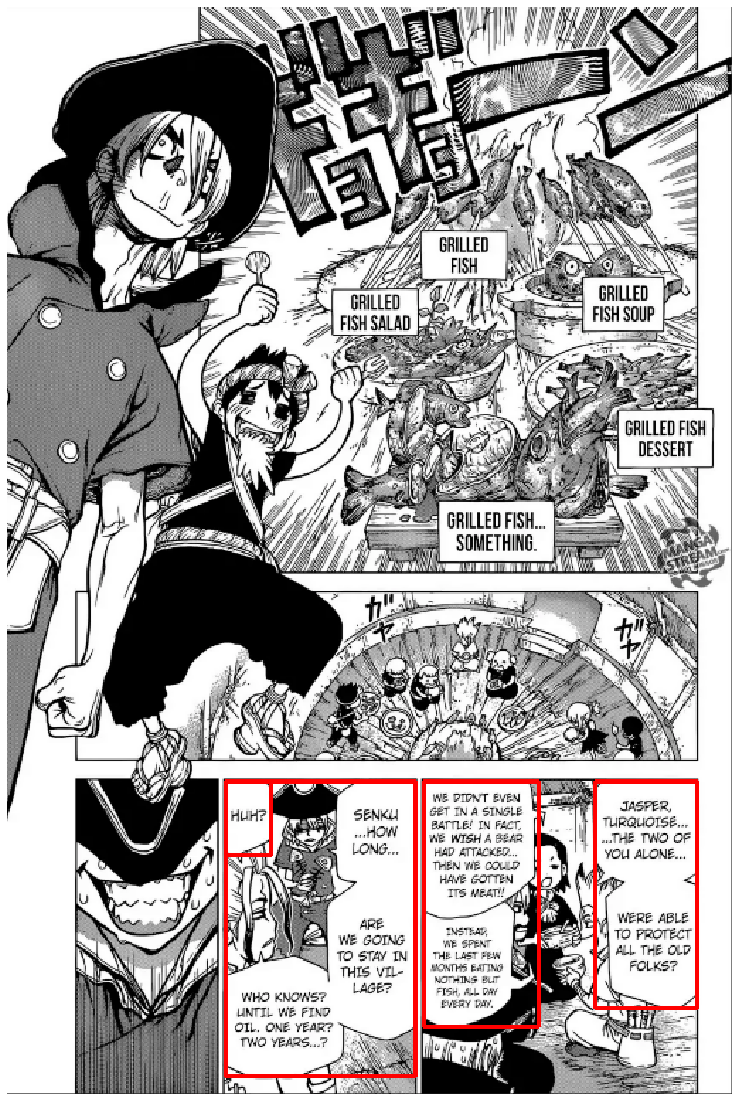

In [28]:
plot(img)

In [29]:
###################################################################################